## Parse Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def list_to_plate(lst: pd.Series) -> pd.DataFrame:
    new_index = pd.MultiIndex.from_tuples([(i[0], int(i[1:])) for i in lst.index])
    plate =  pd.Series(lst.values, index=new_index).unstack()
    return plate

def plate_to_list(plate: pd.DataFrame) -> pd.Series:
    s = plate.stack()
    s.index = [f'{row}{col}' for row, col in s.index]
    return s

def set_plate_axes(df: pd.DataFrame) -> pd.DataFrame:
    """ Given a dataframe representing a multiwell plate, set axes to be proper plate axes. """

    df.columns = range(1, len(df.columns)+1)
    df.index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'][:len(df.index)]
    return df

def bars(df, **kwargs):
    ax = sns.barplot(data=df,alpha=0.8, **kwargs)
    ax = sns.stripplot(data=df, ax=ax, size=6, dodge=True, legend=False,  edgecolor='black', linewidth=1, **kwargs)
    if 'hue' in kwargs.keys():
      plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    return ax


In [3]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from pathlib import Path
DRIVE_FOLDER = Path('/content/drive/Shared drives/Student Biolab Zurich/iDEC/iDEC 2024/Lab results/Phage Propagation Assays/20240924_logic_validation')

!ls "{DRIVE_FOLDER}"

cts = pd.read_csv(DRIVE_FOLDER / '20240925_ON_propagation.txt', sep='\t', header=1)[['Pos', 'Cp']]
cts = list_to_plate(cts.set_index('Pos').Cp)
layout_plate1 = pd.read_excel(DRIVE_FOLDER / 'Layout plate 1.xlsx', header=None)
layout_plate2 = pd.read_excel(DRIVE_FOLDER / 'Layout plate 2.xlsx', header=None)
layout_plate3 = pd.read_excel(DRIVE_FOLDER / 'Layout plate 3.xlsx', header=None)


Mounted at /content/drive
 20240925_analysis.ipynb      'Layout plate 1.xlsx'  'Layout plate 3.xlsx'
 20240925_ON_propagation.txt  'Layout plate 2.xlsx'


In [4]:
cts

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
A,21.80,22.06,22.13,NaN,24.90,24.89,25.09,NaN,22.94,23.68,...,21.96,NaN,24.85,24.78,25.03,NaN,23.53,23.66,23.65,NaN
B,16.20,16.03,16.30,NaN,18.72,18.70,18.88,NaN,18.08,18.84,...,29.33,NaN,NaN,29.10,27.72,NaN,NaN,NaN,NaN,NaN
C,17.45,17.21,17.33,NaN,19.20,19.32,18.81,NaN,20.96,21.06,...,14.71,NaN,17.59,17.02,16.66,NaN,17.49,29.05,19.84,NaN
D,16.01,16.05,16.05,NaN,18.74,18.48,18.15,NaN,18.29,18.23,...,30.46,NaN,29.61,28.98,28.23,NaN,28.06,NaN,NaN,NaN
E,22.24,22.08,21.67,NaN,24.72,24.78,24.68,NaN,22.76,29.53,...,22.03,NaN,24.64,24.77,NaN,NaN,23.53,23.53,23.51,NaN
F,15.94,16.04,16.10,NaN,18.22,18.73,18.69,NaN,18.44,18.55,...,29.55,NaN,28.95,29.15,NaN,NaN,NaN,NaN,NaN,NaN
G,22.19,21.97,22.01,NaN,24.73,25.07,24.94,NaN,23.73,23.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,21.67,22.02,21.95,NaN,24.83,24.66,24.91,NaN,23.46,23.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I,16.37,16.64,17.13,NaN,19.17,18.42,18.86,NaN,20.05,19.71,...,16.07,NaN,17.99,17.51,NaN,NaN,18.92,18.49,18.47,NaN
J,21.46,21.61,21.86,NaN,24.82,24.55,24.83,NaN,23.17,22.95,...,29.60,NaN,29.05,28.83,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
cts1 = plate_to_list(set_plate_axes(cts.iloc[::2, :12])).reset_index().rename(columns={0: 'ct', 'index': 'well'})
cts1['plate'] = 'plate1'
cts2 = plate_to_list(set_plate_axes(cts.iloc[1::2, :12])).reset_index().rename(columns={0: 'ct', 'index': 'well'})
cts2['plate'] = 'plate2'
cts3 = plate_to_list(set_plate_axes(cts.iloc[::2, 12:])).reset_index().rename(columns={0: 'ct', 'index': 'well'})
cts3['plate'] = 'plate3'

cts_all = pd.concat([cts1, cts2, cts3])
list_to_plate(cts1.set_index('well').ct)

,1,2,3,5,6,7,9,10,11,12
A,21.80,22.06,22.13,24.90,24.89,25.09,22.94,23.68,23.50,29.52
B,17.45,17.21,17.33,19.20,19.32,18.81,20.96,21.06,19.98,29.33
C,22.24,22.08,21.67,24.72,24.78,24.68,22.76,29.53,23.83,29.08
D,22.19,21.97,22.01,24.73,25.07,24.94,23.73,23.73,23.73,29.07
E,16.37,16.64,17.13,19.17,18.42,18.86,20.05,19.71,19.16,28.82
F,21.83,21.98,21.99,25.05,25.05,25.07,23.55,23.28,23.19,29.29
G,21.82,21.86,22.12,24.89,25.03,24.79,22.80,23.03,23.54,29.32
H,7.81,7.40,NaN,NaN,7.68,7.77,NaN,9.19,9.36,29.00


In [6]:
cts_all

,well,ct,plate
0,A1,21.80,plate1
1,A2,22.06,plate1
2,A3,22.13,plate1
3,A5,24.90,plate1
4,A6,24.89,plate1
...,...,...,...
29,E5,17.99,plate3
30,E6,17.51,plate3
31,E9,18.92,plate3
32,E10,18.49,plate3


In [7]:
def parse_plate(df, num_cols):
  pass

def parse_layout(layout: pd.DataFrame):
  idx = 0
  plates = []
  while idx < len(layout.index)-9:
    if layout.iloc[idx, 0] is not None:
      plate = set_plate_axes(layout.iloc[idx+2:idx+2+8, 1:1+12])
      print(plate)
      plate = plate_to_list(plate)
      plate.name = layout.iloc[idx,  0]
      plates.append(plate)
      idx += 11
    else:
      idx += 1
  return pd.concat(plates, axis=1)

meta_plate1 = parse_layout(layout_plate1).reset_index().rename(columns={'index': 'well'})
meta_plate1['plate'] = 'plate1'
meta_plate2 = parse_layout(layout_plate2).reset_index().rename(columns={'index': 'well'})
meta_plate2['plate'] = 'plate2'
meta_plate3 = parse_layout(layout_plate3).reset_index().rename(columns={'index': 'well'})
meta_plate3['plate'] = 'plate3'


meta = pd.concat([meta_plate1, meta_plate2, meta_plate3])


            1            2            3    4            5            6   \
A  2049-08-DP6  2049-08-DP6  2049-08-DP6  NaN  2049-08-DP6  2049-08-DP6   
B  2054-08-DP6  2054-08-DP6  2054-08-DP6  NaN  2054-08-DP6  2054-08-DP6   
C  2055-08-DP6  2055-08-DP6  2055-08-DP6  NaN  2055-08-DP6  2055-08-DP6   
D  2049-08-DP6  2049-08-DP6  2049-08-DP6  NaN  2049-08-DP6  2049-08-DP6   
E  2054-08-DP6  2054-08-DP6  2054-08-DP6  NaN  2054-08-DP6  2054-08-DP6   
F  2055-08-DP6  2055-08-DP6  2055-08-DP6  NaN  2055-08-DP6  2055-08-DP6   
G           LB           LB           LB  NaN           LB           LB   
H        S2208        S2208        S2208  NaN        S2208        S2208   

            7    8            9            10           11           12  
A  2049-08-DP6  NaN  2049-08-DP6  2049-08-DP6  2049-08-DP6  2049-08-DP6  
B  2054-08-DP6  NaN  2054-08-DP6  2054-08-DP6  2054-08-DP6  2054-08-DP6  
C  2055-08-DP6  NaN  2055-08-DP6  2055-08-DP6  2055-08-DP6  2055-08-DP6  
D  2049-08-DP6  NaN  2049-08

In [8]:
meta

,well,strain,Phage,van_acid_um,Tetracyclin,plate
0,A1,2049-08-DP6,SIAH1,0,uninduced,plate1
1,A2,2049-08-DP6,SIAH1,0,uninduced,plate1
2,A3,2049-08-DP6,SIAH1,0,uninduced,plate1
3,A5,2049-08-DP6,TadA,0,uninduced,plate1
4,A6,2049-08-DP6,TadA,0,uninduced,plate1
...,...,...,...,...,...,...
31,E6,1076-08-00,TadA,0,uninduced,plate3
32,E7,1076-08-00,TadA,0,uninduced,plate3
33,E9,1076-08-00,SIAH1 KO,0,uninduced,plate3
34,E10,1076-08-00,SIAH1 KO,0,uninduced,plate3


In [9]:
df = pd.merge(cts_all, meta, on=['well', 'plate'])
df

,well,ct,plate,strain,Phage,van_acid_um,Tetracyclin
0,A1,21.80,plate1,2049-08-DP6,SIAH1,0,uninduced
1,A2,22.06,plate1,2049-08-DP6,SIAH1,0,uninduced
2,A3,22.13,plate1,2049-08-DP6,SIAH1,0,uninduced
3,A5,24.90,plate1,2049-08-DP6,TadA,0,uninduced
4,A6,24.89,plate1,2049-08-DP6,TadA,0,uninduced
...,...,...,...,...,...,...,...
182,E5,17.99,plate3,1076-08-00,TadA,0,uninduced
183,E6,17.51,plate3,1076-08-00,TadA,0,uninduced
184,E9,18.92,plate3,1076-08-00,SIAH1 KO,0,uninduced
185,E10,18.49,plate3,1076-08-00,SIAH1 KO,0,uninduced


In [10]:
df.strain.unique()

array(['2049-08-DP6', '2054-08-DP6', '2055-08-DP6', 'LB', 'S2208',
       '1125-44-00', '1117-44-00', '1118-44-00', '00-44-00', '00-08-00',
       '1076-08-00'], dtype=object)

In [24]:
df[df.strain == '2055-08-DP6']

,well,ct,plate,strain,Phage,van_acid_um,Tetracyclin,ct_init,fc_log2,fc
20,C1,22.24,plate1,2055-08-DP6,SIAH1,0,uninduced,21.933333,-0.306667,0.808508
21,C2,22.08,plate1,2055-08-DP6,SIAH1,0,uninduced,21.933333,-0.146667,0.903335
22,C3,21.67,plate1,2055-08-DP6,SIAH1,0,uninduced,21.933333,0.263333,1.200249
23,C5,24.72,plate1,2055-08-DP6,TadA,0,uninduced,24.903333,0.183333,1.135504
24,C6,24.78,plate1,2055-08-DP6,TadA,0,uninduced,24.903333,0.123333,1.089249
25,C7,24.68,plate1,2055-08-DP6,TadA,0,uninduced,24.903333,0.223333,1.167428
26,C9,22.76,plate1,2055-08-DP6,SIAH1 KO,0,uninduced,23.123333,0.363333,1.286395
27,C10,29.53,plate1,2055-08-DP6,SIAH1 KO,0,uninduced,23.123333,-6.406667,0.011787
28,C11,23.83,plate1,2055-08-DP6,SIAH1 KO,0,uninduced,23.123333,-0.706667,0.612734
29,C12,29.08,plate1,2055-08-DP6,no phage,0,uninduced,NaN,NaN,NaN


## Fold change

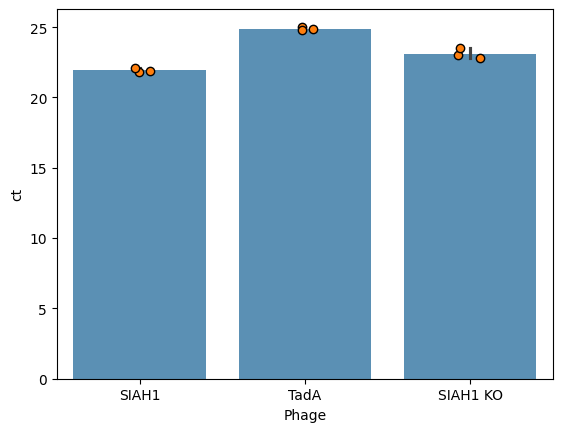

In [12]:
_ = bars(df[df.strain == 'LB'], x='Phage', y='ct')

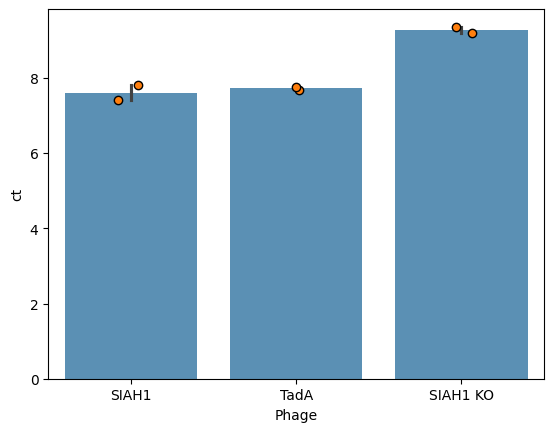

In [13]:
_ = bars(df[df.strain == 'S2208'], x='Phage', y='ct')

In [14]:
df['ct_init'] = pd.NA
for phage in df.Phage.unique():
  df.loc[df.Phage == phage, 'ct_init'] = df[(df.Phage == phage) & (df.strain == 'LB')].ct.mean()

df['fc_log2'] = df.ct_init - df.ct
df['fc'] = 2 ** df.fc_log2
df

,well,ct,plate,strain,Phage,van_acid_um,Tetracyclin,ct_init,fc_log2,fc
0,A1,21.80,plate1,2049-08-DP6,SIAH1,0,uninduced,21.933333,0.133333,1.096825
1,A2,22.06,plate1,2049-08-DP6,SIAH1,0,uninduced,21.933333,-0.126667,0.915945
2,A3,22.13,plate1,2049-08-DP6,SIAH1,0,uninduced,21.933333,-0.196667,0.872564
3,A5,24.90,plate1,2049-08-DP6,TadA,0,uninduced,24.903333,0.003333,1.002313
4,A6,24.89,plate1,2049-08-DP6,TadA,0,uninduced,24.903333,0.013333,1.009285
...,...,...,...,...,...,...,...,...,...,...
182,E5,17.99,plate3,1076-08-00,TadA,0,uninduced,24.903333,6.913333,120.53709
183,E6,17.51,plate3,1076-08-00,TadA,0,uninduced,24.903333,7.393333,168.118343
184,E9,18.92,plate3,1076-08-00,SIAH1 KO,0,uninduced,23.123333,4.203333,18.421688
185,E10,18.49,plate3,1076-08-00,SIAH1 KO,0,uninduced,23.123333,4.633333,24.818316


Text(0.5, 1.0, '2024.09.25 +Tet -van')

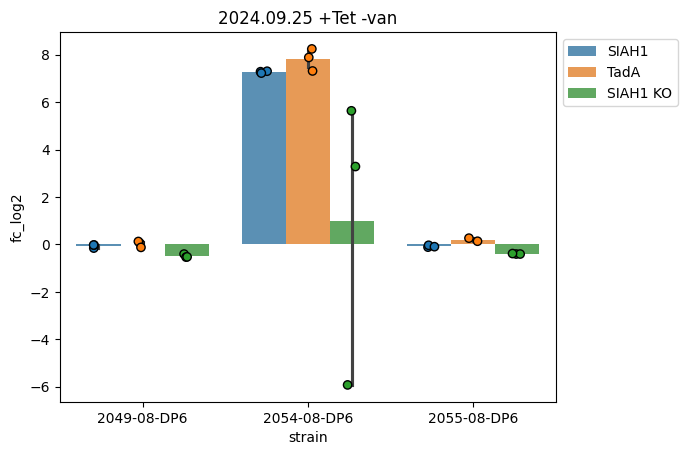

In [33]:
ax = bars(df[(df.Tetracyclin == 'induced')], x='strain', y='fc_log2', hue='Phage')
ax.set_title('2024.09.25 +Tet -van')

<ipython-input-29-7f87e952d531>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


[Text(0, 0, '2054-08-DP6'),
 Text(1, 0, '1125-44-00'),
 Text(2, 0, '1117-44-00'),
 Text(3, 0, '1118-44-00'),
 Text(4, 0, '1076-08-00')]

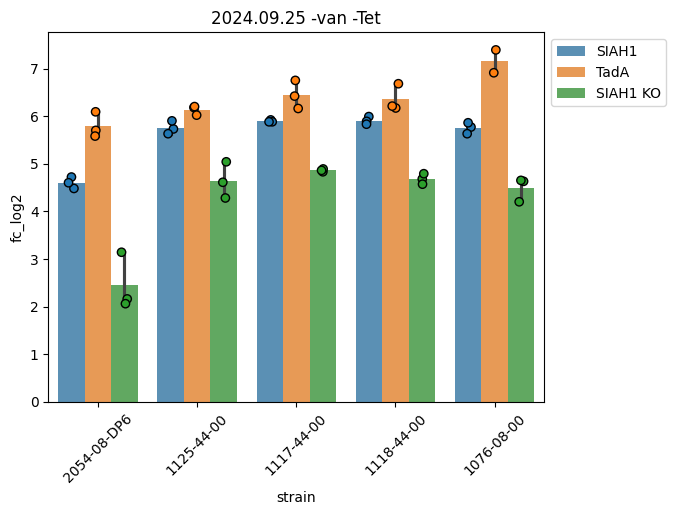

In [29]:
ax = bars(df[(df.van_acid_um == 0) & (df.Tetracyclin == 'uninduced')\
             & (~df.strain.isin({'LB', 'S2208', '00-44-00', '00-08-00', '2049-08-DP6', '2055-08-DP6'})) & (df.Phage != 'no phage')], x='strain', y='fc_log2', hue='Phage')
ax.set_title('2024.09.25 -van -Tet')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

<ipython-input-30-23c5f0337fdf>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


[Text(0, 0, '2054-08-DP6'),
 Text(1, 0, '1125-44-00'),
 Text(2, 0, '1117-44-00'),
 Text(3, 0, '1118-44-00')]

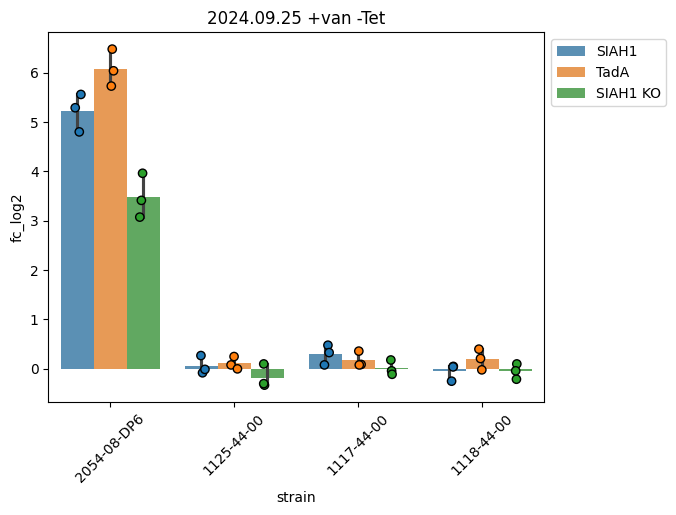

In [30]:
ax = bars(df[(df.van_acid_um == 500) & (df.Tetracyclin == 'uninduced')\
             & (~df.strain.isin({'LB', 'S2208', '00-44-00', '00-08-00', '2049-08-DP6', '2055-08-DP6'})) & (df.Phage != 'no phage')], x='strain', y='fc_log2', hue='Phage')
ax.set_title('2024.09.25 +van -Tet')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

Text(0.5, 1.0, '2024.09.25 -RNAP(N, C) -Tet -van')

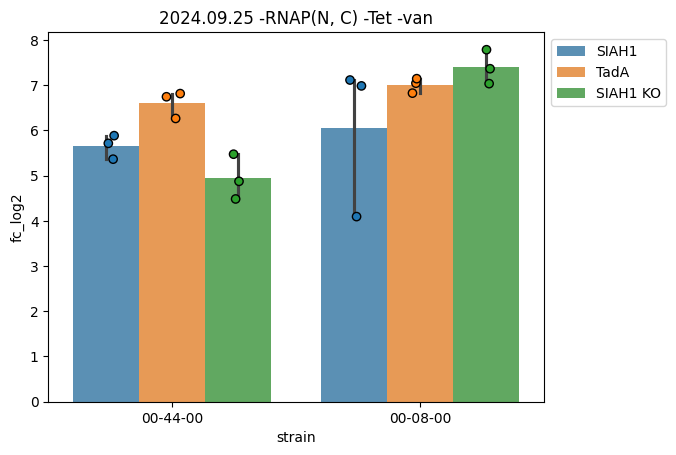

In [32]:
ax = bars(df[ (df.Tetracyclin == 'uninduced') & (df.strain.isin({'00-44-00', '00-08-00'})) & (df.Phage != 'no phage')], x='strain', y='fc_log2', hue='Phage')
ax.set_title('2024.09.25 -RNAP(N, C) -Tet -van')


In [ ]:
ax = bars(df[(df.van_acid_um == 500)], x='strain', y='fc_log2', hue='Phage')
ax.set_title('500um van')